# Salient Object Detection Demo

This notebook demonstrates our trained CNN model detecting salient objects in images.

**What this demo shows:**
- Input image
- Output saliency mask
- Overlay visualization
- Inference time per image

## Step 1: Import Libraries

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
import sys

sys.path.append('src')
from sod_model import SODModel

## Step 2: Load Model

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SODModel()
model.load_state_dict(torch.load('best_model.pth', map_location=device))
model = model.to(device)
model.eval()

print(f"Model loaded on: {device}")

Model loaded on: cpu


## Step 3: Run Demo

Change `image_path` to test different images:

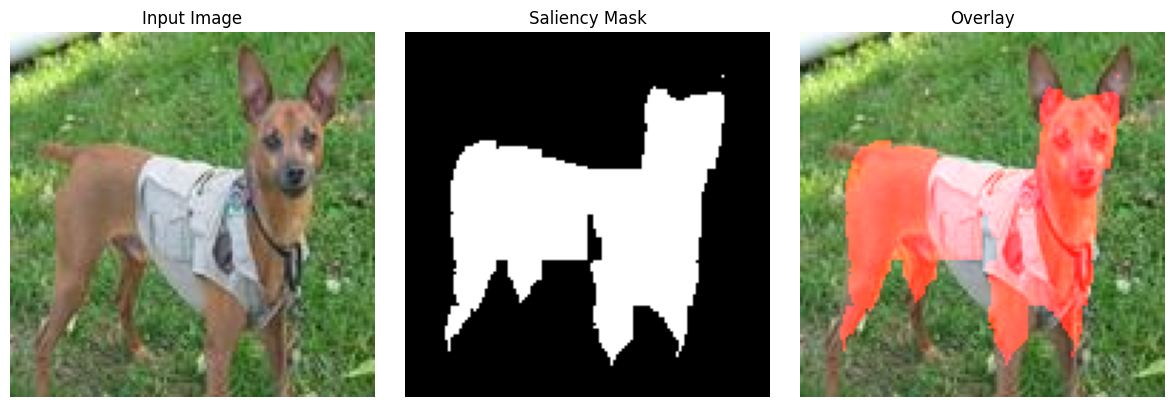

Inference Time: 71.62 ms


In [14]:
image_path = 'data/ECSSD/resized_images_128/0070.jpg'

img = Image.open(image_path).convert('RGB')
img = img.resize((128, 128))
img_array = np.array(img) / 255.0
img_tensor = torch.FloatTensor(img_array).permute(2, 0, 1).unsqueeze(0).to(device)

start_time = time.time()
with torch.no_grad():
    output = model(img_tensor)
inference_time = time.time() - start_time

binary_mask = (output.cpu().squeeze().numpy() > 0.5).astype(np.float32)

overlay = img_array.copy()
overlay[:, :, 0] = np.where(binary_mask > 0.5, 1.0, overlay[:, :, 0])

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img_array)
axes[0].set_title('Input Image')
axes[0].axis('off')

axes[1].imshow(binary_mask, cmap='gray')
axes[1].set_title('Saliency Mask')
axes[1].axis('off')

axes[2].imshow(overlay)
axes[2].set_title('Overlay')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print(f"Inference Time: {inference_time * 1000:.2f} ms")